In [1]:
import csv
import tensorflow as tf
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = "data/Tabel Harga Berdasarkan Daerah.xlsx"
df = pd.read_excel(data)
df = df.T
df.columns = df.iloc[1]
# Menghapus baris pertama dan kedua yang sudah menjadi header kolom
df = df[3:]
# Menampilkan DataFrame setelah transposisi dan penyesuaian kolom

# data2 = "/content/drive/MyDrive/bangkit/jawa timur 2.xlsx"
# df1 = pd.read_excel(data2)
# df1 = df1.T
# df1.columns = df1.iloc[1]
# # Menghapus baris pertama dan kedua yang sudah menjadi header kolom
# df1 = df1[2:]

# df = pd.concat([df,df1])
df.head()

Komoditas (Rp),Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
02/ 01/ 2020,"12,750","11,550","10,750","13,050","12,050","15,450","13,650"
03/ 01/ 2020,"12,850","11,650","10,850","13,100","12,150","15,550","13,700"
06/ 01/ 2020,"13,000","11,850","11,050","13,300","12,300","15,700","13,850"
07/ 01/ 2020,"13,050","11,900","11,050","13,300","12,350","15,750","13,900"
08/ 01/ 2020,"13,050","11,900","11,050","13,300","12,350","15,750","13,900"


In [ ]:
data = "/content/drive/MyDrive/bangkit/Jawa-Barat-Harian.csv"
df = pd.read_csv(data)
df.head()

,Komoditas (Rp),Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II,Bawang Merah,Bawang Merah Ukuran Sedang,...,Cabai Rawit,Cabai Rawit Hijau,Cabai Rawit Merah,Minyak Goreng,Minyak Goreng Curah,Minyak Goreng Kemasan Bermerk 1,Minyak Goreng Kemasan Bermerk 2,Gula Pasir,Gula Pasir Kualitas Premium,Gula Pasir Lokal
0,02-12-2019,9400.0,8850.0,8300.0,9550.0,9200.0,10300.0,10150.0,16650.0,16650.0,...,21450.0,14200.0,26900.0,NaN,NaN,NaN,NaN,10250.0,10500.0,10000.0
1,03-12-2019,9400.0,8850.0,8300.0,9550.0,9200.0,10300.0,10150.0,16650.0,16650.0,...,21450.0,14200.0,26900.0,NaN,NaN,NaN,NaN,10250.0,10500.0,10000.0
2,04-12-2019,9400.0,8850.0,8300.0,9550.0,9200.0,10300.0,10150.0,16650.0,16650.0,...,21450.0,14200.0,26900.0,NaN,NaN,NaN,NaN,10250.0,10500.0,10000.0
3,05-12-2019,9400.0,8850.0,8300.0,9550.0,9200.0,10300.0,10150.0,16650.0,16650.0,...,21450.0,14200.0,26900.0,NaN,NaN,NaN,NaN,10250.0,10500.0,10000.0
4,06-12-2019,9400.0,8850.0,8300.0,9550.0,9200.0,10300.0,10150.0,16650.0,16650.0,...,21450.0,14200.0,26900.0,NaN,NaN,NaN,NaN,10250.0,10500.0,10000.0


# ganti kolom yang diinginkan

In [15]:
df.replace('-', np.nan, inplace=True)
# Loop through each column and remove commas, then convert to integers
for col in df.columns:
    if df[col].dtype == object:  # Check if the column has object (string) dtype
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
df.head()
df.reset_index(inplace=True)


In [16]:
df['index']=df['index'].str.replace(' ', '')
df['index']=df['index'].str.replace('/', '-')

In [18]:
df

Komoditas (Rp),index,Beras,Beras Kualitas Bawah I,Beras Kualitas Bawah II,Beras Kualitas Medium I,Beras Kualitas Medium II,Beras Kualitas Super I,Beras Kualitas Super II
0,02-01-2020,12750.0,11550.0,10750.0,13050.0,12050.0,15450.0,13650.0
1,03-01-2020,12850.0,11650.0,10850.0,13100.0,12150.0,15550.0,13700.0
2,06-01-2020,13000.0,11850.0,11050.0,13300.0,12300.0,15700.0,13850.0
3,07-01-2020,13050.0,11900.0,11050.0,13300.0,12350.0,15750.0,13900.0
4,08-01-2020,13050.0,11900.0,11050.0,13300.0,12350.0,15750.0,13900.0
...,...,...,...,...,...,...,...,...
1237,30-09-2024,15550.0,14150.0,13450.0,15600.0,14700.0,18900.0,16600.0
1238,01-10-2024,15550.0,14150.0,13450.0,15600.0,14700.0,18900.0,16600.0
1239,02-10-2024,15550.0,14150.0,13450.0,15600.0,14700.0,18900.0,16600.0
1240,03-10-2024,15550.0,14150.0,13450.0,15600.0,14700.0,18900.0,16600.0


In [51]:
df['Beras'].tail(1).values[0]

15550.0

In [19]:
df.interpolate(method='linear', inplace=True)
df['Beras'].fillna(method='bfill', inplace=True)  # Forward fill

df.isnull().sum()

C:\Users\Muhammad Jihad A\AppData\Local\Temp\ipykernel_23712\1084105541.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
C:\Users\Muhammad Jihad A\AppData\Local\Temp\ipykernel_23712\1084105541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Beras'].fillna(method='bfill', inplace=True)  # Forward fill
C:\Users\Muhammad Jihad A\AppData\Local\Temp\ip

Komoditas (Rp)
index                       0
Beras                       0
Beras Kualitas Bawah I      0
Beras Kualitas Bawah II     0
Beras Kualitas Medium I     0
Beras Kualitas Medium II    0
Beras Kualitas Super I      0
Beras Kualitas Super II     0
dtype: int64

In [20]:
df.to_excel('data/beras.xlsx', index=False)

In [31]:
df.to_csv("beras.csv", index=False)

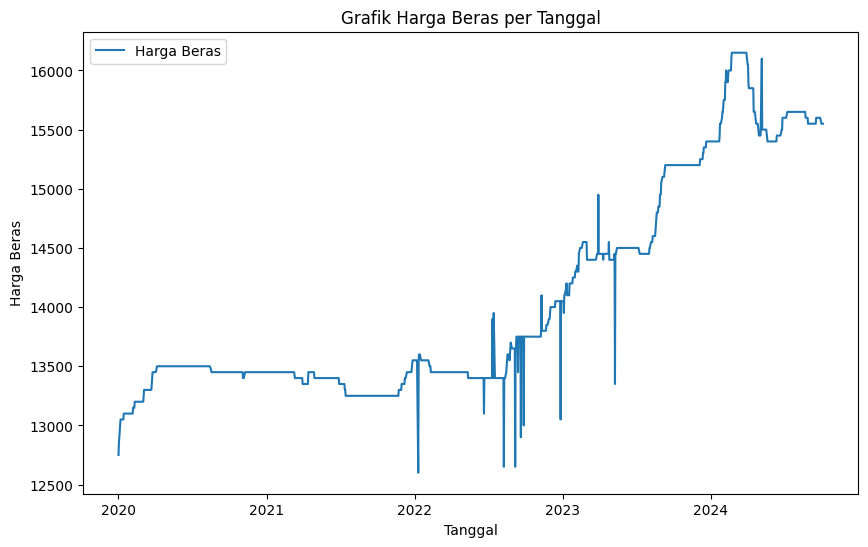

In [22]:
tanggal = pd.to_datetime(df['index'], format="%d-%m-%Y")
price = df['Beras'].astype(float)
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tanggal, price, label='Harga Beras')

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Harga Beras')
plt.title('Grafik Harga Beras per Tanggal')

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


In [23]:
tanggal = pd.to_datetime(df['index'], format="%d-%m-%Y")
time = np.array(tanggal)
time

array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', ...,
       '2024-10-02T00:00:00.000000000', '2024-10-03T00:00:00.000000000',
       '2024-10-04T00:00:00.000000000'], dtype='datetime64[ns]')

In [24]:
from sklearn.preprocessing import MinMaxScaler
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

tanggal = pd.to_datetime(df['index'], format="%d-%m-%Y")
price = df['Beras'].astype(float)

series = np.array(price)

scaler = MinMaxScaler(feature_range=(0, 1))
series = series.reshape(-1, 1)
series = scaler.fit_transform(series)

time = np.array(tanggal)
ssplit = 1024

time_train = time[:ssplit]
x_train = series[:ssplit]
time_valid = time[ssplit:]
x_valid = series[ssplit:]


x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_valid = (x_valid - np.min(series)) / (np.max(series) - np.min(series))

window_size = 32
batch_size = 64
shuffle_buffer_size = 100

train_set = windowed_dataset(series,
                              window_size,
                              batch_size,
                              shuffle_buffer_size)

valid_set = windowed_dataset(x_valid,
                              window_size,
                              batch_size,
                              shuffle_buffer_size)

print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=50, verbose=1)
optimizer = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mse'])

history = model.fit(train_set,
                    epochs=100,callbacks=[early_stopping])



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None))>
(1024, 1)



Epoch 1/100



19/19 [==============================] - 6s 50ms/step - loss: 0.1719 - mse: 0.0511
Epoch 2/100
19/19 [==============================] - 0s 24ms/step - loss: 0.2066 - mse: 0.0726
Epoch 3/100
19/19 [==============================] - 2s 88ms/step - loss: 0.1604 - mse: 0.0444
Epoch 4/100
19/19 [==============================] - 1s 26ms/step - loss: 0.1191 - mse: 0.0298
Epoch 5/100
19/19 [==============================] - 1s 25ms/step - loss: 0.0904 - mse: 0.0213
Epoch 6/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0769 - mse: 0.0182
Epoch 7/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0748 - mse: 0.0172
Epoch 8/100
19/19 [==============================] - 0s 25ms/step - loss: 0.1238 - mse: 0.0284
Epoch 9/100
19/19 [==============================] - 1s 26ms/step - loss: 0.0966 - mse: 0.0211
Epoch 10/100
19/19 [==============================] - 0s 24ms/step - loss: 0.0929 - mse: 0.0181
Epoch 11/100
19/19 [==============================] - 0s 25ms

KeyError: 'val_loss'

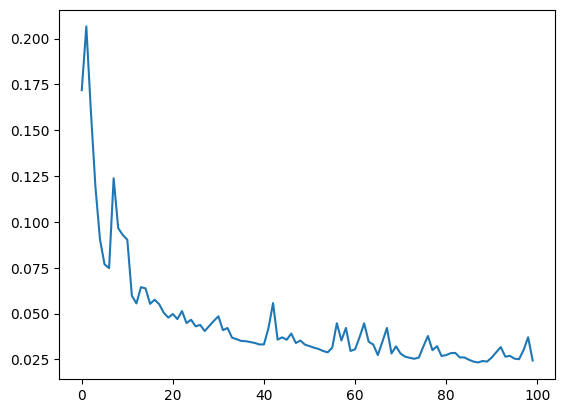

In [25]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Save Model

In [32]:
model.save("model/model_beras.h5")

c:\Users\fauzan\anaconda3\envs\nasa\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model = tf.keras.models.load_model('/model/model_beras.h5')

OSError: No file or directory found at /model/model_beras.h5

In [29]:
forecast = []
for times in range(len(series)):
    input_data = series[times:times + window_size][np.newaxis]
    prediction = model.predict(input_data)
    forecast.append(prediction[0, 0])

forecast = np.array(forecast)

1/1 [==============================] - 0s 18ms/step


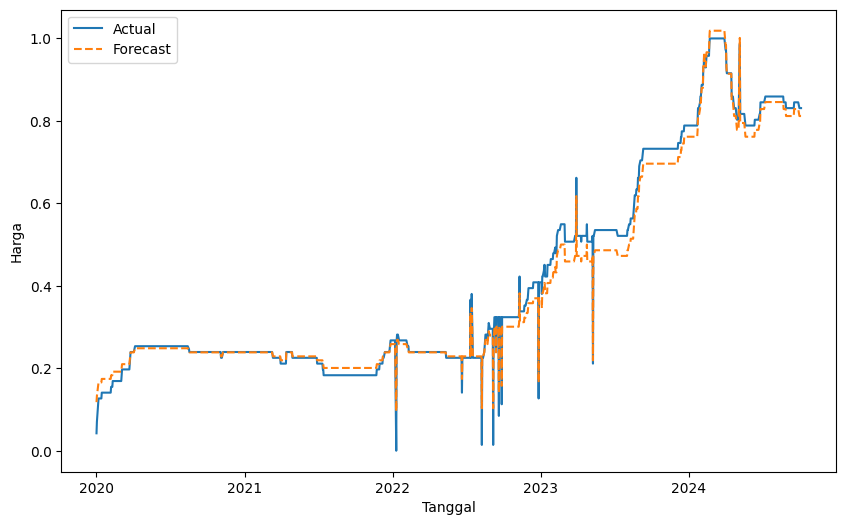

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(time, series, label='Actual')  # Use time_train and x_train here
plt.plot(time, forecast, label='Forecast', linestyle='dashed')  # Use time_train here
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

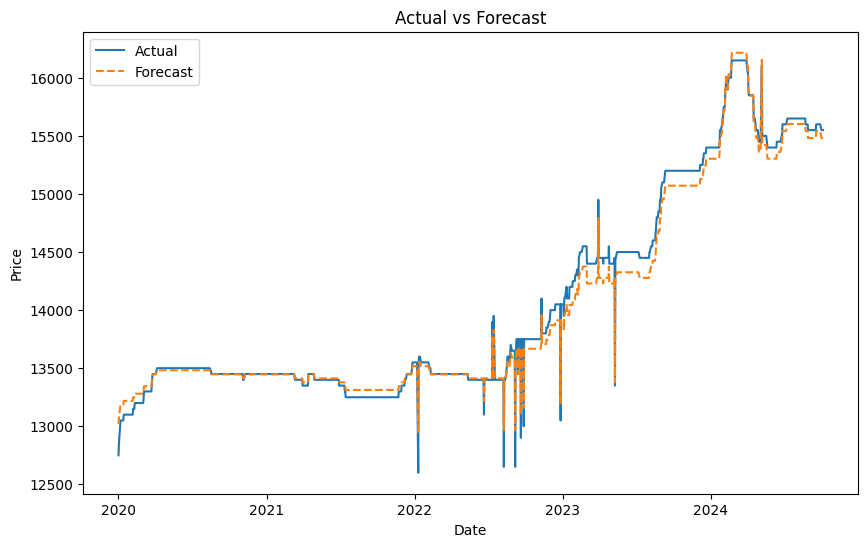

In [38]:
import matplotlib.pyplot as plt

# Assuming `time_valid` is the time array corresponding to x_valid
x_valid_original = scaler.inverse_transform(series)
forecast_original = scaler.inverse_transform(forecast)
# Plot actual values
plt.figure(figsize=(10, 6))
plt.plot(time, x_valid_original, label='Actual')
plt.plot(time, forecast_original, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


In [39]:
series[-30:][np.newaxis]

array([[[0.84507042],
        [0.84507042],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.84507042],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592],
        [0.83098592]]])

In [35]:
# Assuming `model` is your trained LSTM model
from sklearn.preprocessing import MinMaxScaler
# model = tf.keras.models.load_model('/content/model_Jawa Timur_Minyak Goreng.h5')
# Number of days to predict in the future
future_days = 150
tanggal = pd.to_datetime(df['index'], format="%d-%m-%Y")
price = df['Beras'].astype(float)
series = np.array(price)
window_size = len(series)
scaler = MinMaxScaler(feature_range=(0, 1))
series = series.reshape(-1, 1)
series = scaler.fit_transform(series)
# Create an array for input data, starting from the last day in x_train
input_data = series[(future_days-10):future_days][np.newaxis]

# Initialize an array to store the predictions
future_forecast = []

# Loop to predict the future values
for _ in range(60):
    # Predict the next value
    prediction = model.predict(input_data)

    # Append the prediction to the future forecast
    future_forecast.append(prediction[0, 0])

    # Update the input data by removing the first element and appending the predicted value
    input_data = np.append(input_data[:, 1:, :], [[prediction[0, 0]]], axis=1)

# Convert the future forecast to a NumPy array
future_forecast = np.array(future_forecast)

# Print or use the future_forecast array as needed
# print(future_forecast)


1/1 [==============================] - 0s 26ms/step


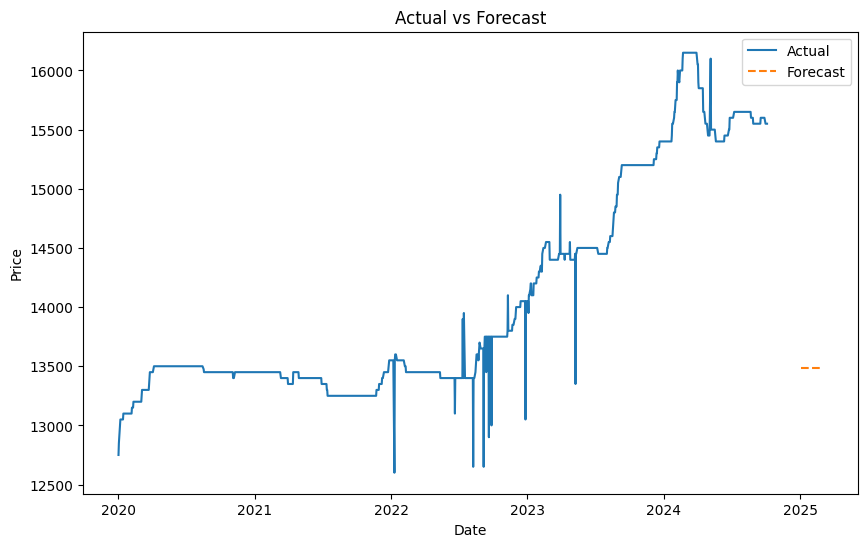

In [37]:
import matplotlib.pyplot as plt
time = np.array(tanggal)
# Assuming `time_valid` is the time array corresponding to x_valid
x_valid_original = scaler.inverse_transform(series)
forecast_original = scaler.inverse_transform(future_forecast)
# Plot actual values
plt.figure(figsize=(10, 6))
plt.plot(time, x_valid_original, label='Actual')

# Plot forecasted values for the future_days
future_dates = pd.date_range(start=time[-1], periods=future_days+1)[1:]  # Generate future dates
plt.plot(future_dates[-60:], forecast_original, label='Forecast', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


In [ ]:
# Assuming x_train and forecast are normalized values between 0 and 1
x_train_original = scaler.inverse_transform(x_train)
forecast_original = scaler.inverse_transform(forecast)

plt.figure(figsize=(10, 6))
plt.plot(time_train, x_train_original, label='Actual')
plt.plot(time_train, forecast_original, label='Forecast')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()


In [41]:
forecast = []
for time in range(len(x_train)):
    input_data = x_train[time:time + window_size][np.newaxis]
    prediction = model.predict(input_data)
    forecast.append(prediction[0, 0])

forecast = np.array(forecast)

1/1 [==============================] - 0s 87ms/step


KeyboardInterrupt: 

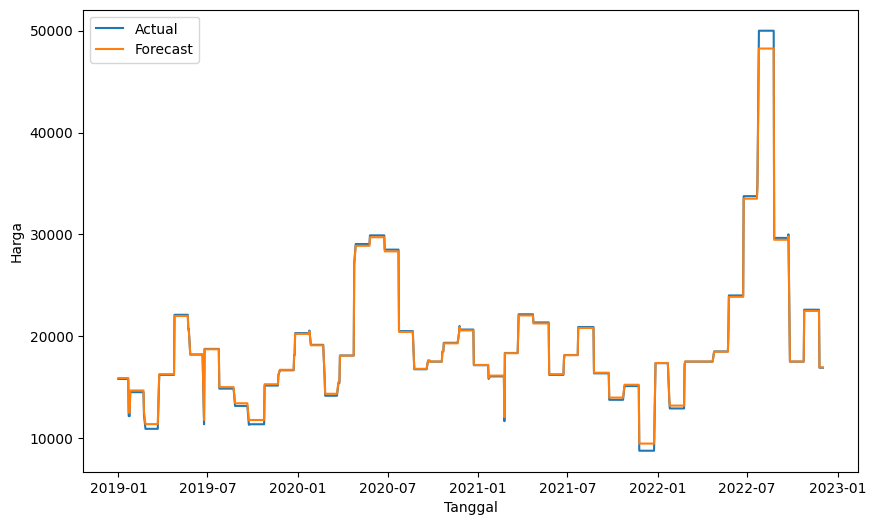

In [ ]:
# Assuming x_train and forecast are normalized values between 0 and 1
x_train_original = scaler.inverse_transform(x_train)
forecast_original = scaler.inverse_transform(forecast)

plt.figure(figsize=(10, 6))
plt.plot(time_train, x_train_original, label='Actual')
plt.plot(time_train, forecast_original, label='Forecast')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()


In [42]:
# Assuming `model` is your trained LSTM model

# Number of days to predict in the future
future_days = 30

# Create an array for input data, starting from the last day in x_train
input_data = x_train[:30][np.newaxis]

# Initialize an array to store the predictions
future_forecast = []

# Loop to predict the future values
for _ in range(future_days):
    # Predict the next value
    prediction = model.predict(input_data)

    # Append the prediction to the future forecast
    future_forecast.append(prediction[0, 0])

    # Update the input data by removing the first element and appending the predicted value
    input_data = np.append(input_data[:, 1:, :], [[prediction[0, 0]]], axis=1)

# Convert the future forecast to a NumPy array
future_forecast = np.array(future_forecast)

# Print or use the future_forecast array as needed
# print(future_forecast)


1/1 [==============================] - 0s 23ms/step


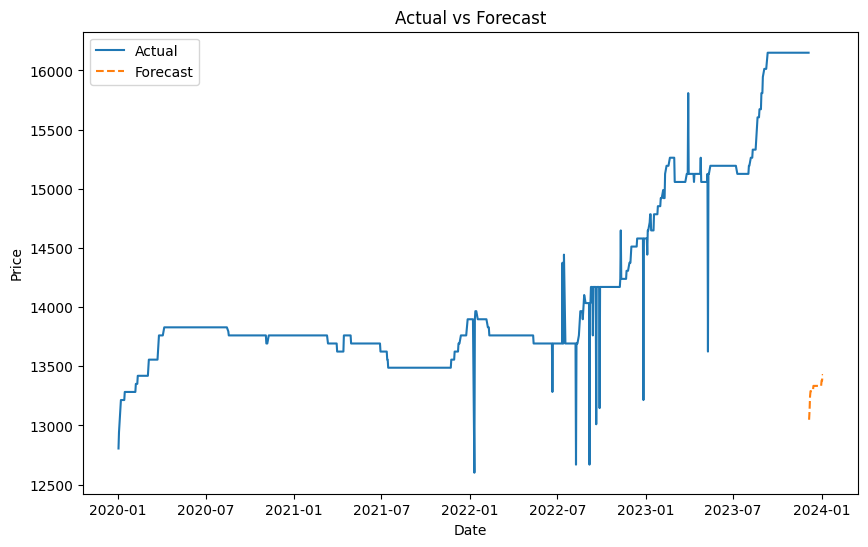

In [43]:
import matplotlib.pyplot as plt

# Assuming `time_valid` is the time array corresponding to x_valid
x_train_original = scaler.inverse_transform(x_train)
forecast_original = scaler.inverse_transform(future_forecast)
# Plot actual values
plt.figure(figsize=(10, 6))
plt.plot(time_train, x_train_original, label='Actual')

# Plot forecasted values for the future_days
future_dates = pd.date_range(start=time_train[-1], periods=future_days+1)[1:]  # Generate future dates
plt.plot(future_dates, forecast_original, label='Forecast', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Flatten arrays to make sure they are 1-dimensional
time_train_flat = time_train[window_size:].flatten()
x_train_flat = x_train_original[window_size:].flatten()
forecast_flat = forecast_original[window_size:].flatten()

# Assuming x_train_original and forecast_original are your original time series data and forecast
df_result = pd.DataFrame({
    'Tanggal': time_train_flat,
    'Actual': x_train_flat,
    'Forecast': forecast_flat
})




       Tanggal   Actual      Forecast
0   2019-02-14  14500.0  14800.613281
1   2019-02-15  14500.0  14800.613281
2   2019-02-18  14500.0  14800.613281
3   2019-02-19  14500.0  14800.613281
4   2019-02-20  14500.0  14800.613281
..         ...      ...           ...
987 2022-11-28  16900.0  17005.755859
988 2022-11-29  16900.0  17005.755859
989 2022-11-30  16900.0  17005.755859
990 2022-12-01  16900.0  17005.755859
991 2022-12-02  16900.0  17005.753906

[992 rows x 3 columns]


In [ ]:
np.arange(len(x_valid_original), len(x_valid_original) + additional_days)

array([257, 258, 259, 260, 261, 262, 263, 264, 265, 266])

1/1 [==============================] - 0s 20ms/step


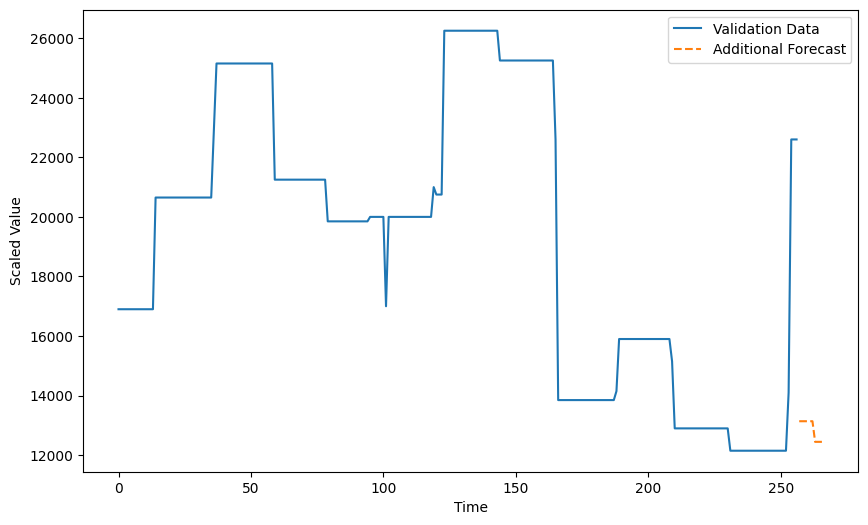

In [ ]:
# Number of additional days to predict
additional_days = 10
forecast_final = forecast.copy()
# Create an empty list to store predictions for additional days
additional_forecast = []

# Start predicting from the last day of the validation set
time = len(x_valid) - window_size
forecast_final = forecast_final.tolist()  # Convert forecast to a list

# Loop for additional days
for _ in range(additional_days):
  # Extract window data
  input_data = x_valid[time:time + window_size][np.newaxis]

  # Predict next value
  prediction = model.predict(input_data)

  # Add prediction to forecast
  forecast_final.append(prediction[0, 0])

  # Update time
  time += 1

  # Add predicted value to additional forecast list
  additional_forecast.append(prediction[0, 0])

# Combine forecasts
full_forecast = np.concatenate([forecast_final, additional_forecast])
# Assuming x_train and forecast are normalized values between 0 and 1
x_valid_original = scaler.inverse_transform(x_valid)
additional_forecast = scaler.inverse_transform(additional_forecast)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(x_valid_original)), x_valid_original, label='Validation Data')
plt.plot(np.arange(len(x_valid_original), len(x_valid_original) + additional_days), additional_forecast, label='Additional Forecast', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()
